<a href="https://colab.research.google.com/github/thfruchart/1nsi-2020/blob/master/Chap16/COURS_Recherche_Dichotomique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recherche dichotomique dans un tableau trié

## 1. Recherche en temps linéaire

Pour rechercher si une valeur v appartient ou non à un tableau t, il faut parfois parcourir **toutes** les valeurs de t : c'est le cas lorsque
1. on souhaite compter le nombre total d'occurrences de la valeur v dans t
2. et lorsque v ne figure **pas** dans le tableau : dans ce cas la vérification doit se faire jusqu'à la dernière cellule de t.



In [ ]:
def est_present(t, v) :
    for i in range(len(t)):
        if t[i] == v :
            return True
    return False

Le temps d'exécution (dans le pire des cas) est alors proportionnel à la taille du tableau.
* on dit que la complexité en temps de la recherche est **linéaire**.
*  Si on note $n$ la taille du tableau, on dit que le temps d'execution $T(n)$ est de l'ordre de n, et on note $T(n) = O(n)$.

## 2. Amélioration si le tableau est trié

Pour améliorer l'efficacité de la recherche, on peut trier le tableau t.

Dans ce cas, la recherche d'une valeur v dans t peut se faire suivant une méthode dichotomique : le principe consiste à "couper en deux" la zone de recherche à chaque étape. 

Principe de la recherche dichotomique:
* initialement la zone de recherche contient la totalité du tableau.
* à chaque étape :
   * on détermine la cellule médiane de la zone de recherche
   * on compare la valeur v avec cette valeur médiane : 
   * si elles sont indentiques, la recherche s'arrête.
   * sinon on restreint la zone de recherche, soit à gauche, soit à droite de la valeur médiane. 




```
tableau trié t |. . .      . . .|. . .      . . .|. . .      |
    indice      0                g       m      d             len(t)
```



### Fonction recherche dichotomique

In [ ]:
def recherche_dicho(t, v):
    g = 0 # indice gauche de la zone de recherche
    d = len(t) - 1  # indice droit de la zone de recherche
    while (g <= d) :
        m = (g + d) // 2  # indice médian de la zone de recherche
        if t[m] == v:
                return True
        elif t[m] < v:
                g = m + 1
        else:# v < t[m]
                d = m - 1
    return False

### a) Terminaison de l'algorithme

L'algorithme utilise une boucle non bornée, `while`. A priori, cette boucle pourrait ne pas se terminer.

Pour prouver la terminaison de cette boucle, on utilise la technique du **variant**.

**Travail à faire** :
Déterminer une expression qui est un variant de cette boucle, c'est à dire
* un nombre entier naturel
* qui décroît strictement à chaque itération de la boucle

**Réponse** : **`d-g`** est un variant de la boucle while.

**Raisonnement** : on prouve que c'est bien un variant de boucle en deux temps.

1. C'est un entier car g et d sont deux entiers naturels et m est le résultat de la **division entière** de (g+d) par 2. 



2. cet entier décroît strictement dans la boucle `while` car... 


* la boucle while s'exécute à condition que ` g<=d` 
*  `m =(g+d)//2` donc `m` est un nombre compris entre `g` et `d` au sens large : `g <= m <= d`

Ensuite 3 cas sont possibles : 
* if t[m] == v: on sort de la boucle . Il n'y a rien à démontrer, car la fonction se termine immédiatement.
* sinon, soit g = m + 1 donc g augmente  => (d-g) diminue strictement
* sinon, d = m-1, donc d diminue => (d-g) diminue strictement


### b) Correction de l'algorithme

Pour vérifier que l'algorithme est **correct**, on peut bien sûr élaborer des tests.

Ici, on va **prouver** la correction de cet algorithme avec un **invariant de boucle**, c'est à dire une propriété
* qui est vraie avant le début de la boucle, 
* et qui reste vraie à chaque itération. 

In [ ]:
def recherche_dicho(t, v):
    g = 0 
    d = len(t) - 1  
    # invariant  :  v ne figure pas dans le tableau en dehors de la zone de recherche
    # c'est à dire que t[:g] ne contient pas v
    # et que t[d+1:] ne contient pas v
    while (g <= d) :
        m = (g + d) // 2  
        if t[m] == v:
                return True
        elif t[m] < v:
                g = m + 1
        else:#t[m] > v
                d = m - 1
    return False

```
                      t[:g]                           t[d+1:]              
                ________________                  ___________
tableau trié t |. . .      . . .|. . .      . . .|. . .      |
    indice      0                g       m      d 
```

* avant le début de la boucle, `g = 0` et
`d = len(t)-1` donc `t[:g]` et `t[d+1:`] sont des tableaux vides. On en déduit que `v` n'y figure pas !

* à chaque itération, la condition ` g<=d` est vérifiée,  et  on calcule `m =(g+d)//2` donc `m` est un nombre compris entre `g` et `d` au sens large : `g <= m <= d`
   * si `t[m] == v` alors la fonction prend fin et la valeur renvoyée, `True`,  est évidemment correcte puisque `v` figure dans le tableau `t` à l'indice `m` !
   * sinon, si `t[m] < v`, puisque le tableau t est **trié**, on peut dire que `v` ne figure pas dans `t[:m+1]`. En fin de boucle, m+1 est la nouvelle valeur de g donc v en figure pas dans `t[:g]`
   * enfin, dans le dernier cas, `t[m] > v` autrement dit `v<t[m]`et  puisque le tableau t est **trié**, on peut dire que `v` ne figure pas dans `t[m:]`. En fin de boucle, `d = m - 1` donc `m= d + 1`. On en déduit que `v` ne figure pas dans `t[d+1:]`

* ceci permet de conclure qu'à la sortie de la boucle while, 
   * on a : `g > d` donc `g>= d+1`
   * v ne figure ni dans `t[:g]` ni dans `t[d+1:]`
   * donc `v` ne figure à aucun des indices du tableau `t` : dans ce cas, la fonction renvoie False, qui est donc la valeur correcte. 



## Complexité en temps de la recherche dichotomique

**Propriété** :
Si la taille  du tableau est  $n < 2^k$, alors la recherche dichotomique nécessite au maximum $k$ passages dans la boucle while. 

Chaque passage dans la boucle while s'exécute en "temps constant", donc la complexité en temps de la recherche dichotomique est de l'ordre de $k$ pour un tableau de taille $n < 2^k$



In [ ]:
from math import log2

for k in range(1,9):
    n = 2**k
    print("k =",k,"et n=", n,"ou", bin(n), f" et log2({n}) =", log2(n))

In [ ]:
bin(2021), log2(2021)

Pour $x>0$,  $log_2(x)$ est **environ** égal au **nombre de chiffres de l'écriture binaire de x** (à une unité près). 

Vocabulaire : 
* $n = 2^k$  est appelé exponentielle (base 2) de k
* $k$ est appelé logarithme (base 2) de $n$

#### **PROPRIÉTÉ :**
on dit que la **complexité en temps** de la recherche **dichotomique** sur un tableau trié de taille $n$ est **logarithmique** et on note $T(n) = O(log_2 (n))$

#### Chronométrage

Recherche dichotomique vs recherche linéaire dans le pire des cas.

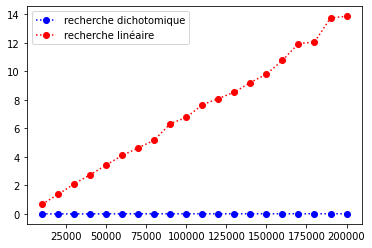

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
from math import log2

def chrono_recherche_dicho_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution de 
    la recherche dichotomique dans le PIRE des cas
    sur un tableau de taille n '''
    t = [0 for i in range(n)]
    start = perf_counter()
    recherche_dicho(t,1)
    stop = perf_counter()
    return 1000*(stop - start)


def chrono_est_present_sur_taille(n):
    ''' renvoie le temps (en milliseconde) d'exécution de 
    la recherche linéaire dans le PIRE des cas
    sur un tableau de taille n '''
    t = [0 for i in range(n)]
    start = perf_counter()
    est_present(t,1)
    stop = perf_counter()
    return 1000*(stop - start)
# Tri sur des tableaux de taille 100, 200, ... 1000
abs = []
ord_dicho = []
ord_lin = []
debut = 10000
fin = 200000
pas = 10000
for n in range(debut,fin + 1,pas):
    abs.append(n)
    ord_dicho.append(chrono_recherche_dicho_sur_taille(n))
    ord_lin.append(chrono_est_present_sur_taille(n))
# graphique
plt.plot(np.array(abs), np.array(ord_dicho),  "b:o",label="recherche dichotomique")
plt.plot(np.array(abs), np.array(ord_lin),"r:o",label="recherche linéaire")
plt.legend()
plt.show() # affiche la figure a l'ecran

# Que retenir ?
### Au moins... 

* Une recherche dichotomique ne peut se faire que sur un tableau trié.
* Une recherche dichotomique consiste à systématiquement découper la zone de recherche en deux jusqu'à trouver (ou non) la valeur cherchée :
   * La zone de recherche est délimitée par un indice de début et un indice de fin.
   * On teste si la valeur médiane de cette valeur de recherche est égale à la valeur cherchée.
   * Tant que l'on n'a pas trouvé la valeur cherchée, on restreint la zone de recherche en déplaçant l'indice de début ou l'indice de fin.
   * Si, à l'issue de ces redécoupages successifs, la zone de recherche se réduit à une seule valeur et qu'on a toujours pas trouvé la valeur cherchée, c'est que la valeur est absente du tableau.
* Le **variant** permettant de prouver la **terminaison** de l'algorithme est la différence (indice_de_fin - indice_debut).

### Au mieux...

* Savoir démontrer la terminaison de l'algorithme dichotomique.
* Comprendre la correction de l'algorithme dichotomique.
* La complexité d'un algorithme dichotomique est de O(Log(n)).